In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import fancyimpute

os.chdir('C:/Users/mgow/PycharmProjects/DataMiningGroupProjectGit')
df = pd.read_csv('hospitalData.csv')

C:\Users\mgow\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [3]:
df.head()

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,...,83.0,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0
1,1,010005,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,...,88.0,85.0,88.0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,...,84.0,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0
3,3,010007,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,...,85.0,86.0,85.0,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0
4,4,010008,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,...,NaN,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0


In [4]:
# what is the pattern of the blank survey scores needing to be filled?

df.isnull().sum(axis=0)

Unnamed: 0                         0
Provider ID                        0
COMP_HIP_KNEE                   2213
MORT_30_AMI                     2533
MORT_30_CABG                    3930
MORT_30_COPD                    1393
MORT_30_HF                      1287
MORT_30_PN                       768
MORT_30_STK                     2373
PSI_10_POST_KIDNEY              2203
PSI_11_POST_RESP                2226
PSI_12_POSTOP_PULMEMB_DVT       1974
PSI_13_POST_SEPSIS              2219
PSI_14_POSTOP_DEHIS             2197
PSI_15_ACC_LAC                  2009
PSI_3_ULCER                     1779
PSI_4_SURG_COMP                 3238
PSI_6_IAT_PTX                   1758
PSI_8_POST_HIP                  1760
PSI_90_SAFETY                   1730
PSI_9_POST_HEM                  1978
H_CLEAN_LINEAR_SCORE            1415
H_COMP_1_LINEAR_SCORE           1415
H_COMP_2_LINEAR_SCORE           1415
H_COMP_3_LINEAR_SCORE           1415
H_COMP_5_LINEAR_SCORE           1415
H_COMP_6_LINEAR_SCORE           1415
H

In [ ]:
# grab just rows that have scores - we need to figure out the best way to impute these values

df_has_survey = df.loc[df['H_RECMND_LINEAR_SCORE'].notnull()]
df_has_survey.head()

In [10]:
df_survey_predictors = df_has_survey[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
              'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
              'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
              'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
              'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
              'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']]

df_survey_predictors.head()
df_survey_predictors.isnull().sum(axis=0)

COMP_HIP_KNEE                    870
MORT_30_AMI                     1149
MORT_30_CABG                    2516
MORT_30_COPD                     438
MORT_30_HF                       291
MORT_30_PN                       196
MORT_30_STK                      991
PSI_10_POST_KIDNEY               828
PSI_11_POST_RESP                 848
PSI_12_POSTOP_PULMEMB_DVT        625
PSI_13_POST_SEPSIS               841
PSI_14_POSTOP_DEHIS              805
PSI_15_ACC_LAC                   655
PSI_3_ULCER                      573
PSI_4_SURG_COMP                 1823
PSI_6_IAT_PTX                    564
PSI_8_POST_HIP                   564
PSI_90_SAFETY                    562
PSI_9_POST_HEM                   628
H_CLEAN_LINEAR_SCORE               0
H_COMP_1_LINEAR_SCORE              0
H_COMP_2_LINEAR_SCORE              0
H_COMP_3_LINEAR_SCORE              0
H_COMP_5_LINEAR_SCORE              0
H_COMP_6_LINEAR_SCORE              0
H_COMP_7_LINEAR_SCORE              0
H_HSP_RATING_LINEAR_SCORE          0
H

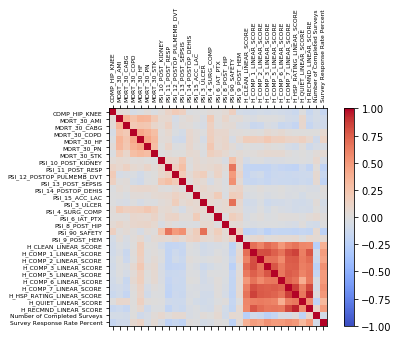

In [11]:
corr = df_survey_predictors.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_survey_predictors.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_survey_predictors.columns, fontsize=6)
ax.set_yticklabels(df_survey_predictors.columns, fontsize=6)
plt.show()

Survey response rate % seems to be the most correlated with survey scores. However, there are 716 rows that don't have response rate provided, so we will have to work around that. Since the survey responses seem to be all or nothing (they are either all populated or all null), we can't use one survey response to predict another, despite the high correlation between them. In addition, all of the complication rates have missing values that will need to be examined separately and filled.

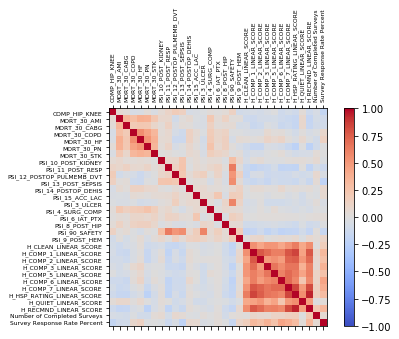

In [5]:
# out of curiosity - let's see how the correlation matrix is affected when you keep only 
# filled rows

df_predictors = df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
              'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
              'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
              'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
              'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
              'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']]
df_drop_na = df_predictors.dropna(how='any')
df_drop_na.count()

corr = df_drop_na.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_drop_na.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_drop_na.columns, fontsize=6)
ax.set_yticklabels(df_drop_na.columns, fontsize=6)
plt.show()

# doesn't particularly highlight other correlations, and actually removes the useful negative
# correlation between number of completed surveys and survey scores

We'll try two methods using fancyimpute. The first is IterativeImputer, which models each feature as a function of other features (mulitple regression). The second is KNN, which chooses the 3 nearest neighbors that have the feature filled and takes the average of those.

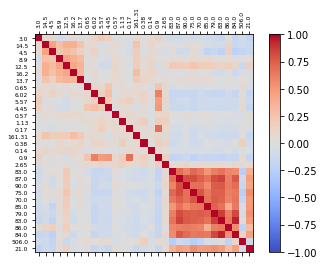

In [18]:
# Model each feature with missing values as a function of other features, and
# use that estimate for imputation.
filled_iterative_np = fancyimpute.IterativeImputer().fit_transform(df_predictors)
# df_filled_iterative = # need to figure out how to turn this back into dataframe with column names

corr = df_filled_iterative.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_filled_iterative.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_filled_iterative.columns, fontsize=6)
ax.set_yticklabels(df_filled_iterative.columns, fontsize=6)
plt.show()

# looks like the correlations we saw before are generally retained

In [26]:
# look at means of each measure

df_filled_iterative.head()

,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,5.57,...,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0
3.000000,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,90.000000,75.000000,70.0000,85.000000,79.000000,83.000000,86.000000,84.00000,506.0,21.0
3.000000,3.000000,15.500000,3.996520,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,94.000000,85.000000,81.0000,88.000000,81.000000,88.000000,85.000000,88.00000,1135.0,34.0
3.600000,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,91.000000,83.000000,76.0000,83.000000,80.000000,84.000000,82.000000,84.00000,579.0,22.0
2.800000,2.800000,14.475446,4.002971,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,94.000000,84.000000,79.0000,85.000000,80.000000,85.000000,86.000000,85.00000,185.0,27.0
2.627473,2.627473,13.330037,3.430419,8.0,12.9,15.7,14.308644,1.307649,8.094203,3.849254,...,91.931832,87.369014,80.2436,87.848268,82.269619,88.613031,83.251764,87.86228,63.0,31.0


In [15]:
# Use 10 nearest rows which have a feature to fill in each row's missing features

df_filled_knn = fancyimpute.KNN(k=10).fit_transform(df_predictors)

Imputing row 1/4944 with 0 missing, elapsed time: 4.954
Imputing row 101/4944 with 1 missing, elapsed time: 4.973
Imputing row 201/4944 with 0 missing, elapsed time: 4.992
Imputing row 301/4944 with 2 missing, elapsed time: 5.014
Imputing row 401/4944 with 1 missing, elapsed time: 5.023
Imputing row 501/4944 with 0 missing, elapsed time: 5.031
Imputing row 601/4944 with 16 missing, elapsed time: 5.051
Imputing row 701/4944 with 31 missing, elapsed time: 5.075
Imputing row 801/4944 with 0 missing, elapsed time: 5.087
Imputing row 901/4944 with 1 missing, elapsed time: 5.093
Imputing row 1001/4944 with 2 missing, elapsed time: 5.110
Imputing row 1101/4944 with 5 missing, elapsed time: 5.137
Imputing row 1201/4944 with 0 missing, elapsed time: 5.161
Imputing row 1301/4944 with 28 missing, elapsed time: 5.173
Imputing row 1401/4944 with 9 missing, elapsed time: 5.197
Imputing row 1501/4944 with 4 missing, elapsed time: 5.220
Imputing row 1601/4944 with 0 missing, elapsed time: 5.262
Imputi

In [ ]:
# we don't want the zeros, so let's replace them with the overall mean
